In [1]:
import numpy as np

class DSP:
    signal = [1.0,0.0]
    samples = 2
    fs = 1.0
    def __init__ (self,signal,fs=1):
        if samples > 1:
            self.signal=signal
            self.samples = len(signal)
            self.fs = fs
        else:
            raise RuntimeError("Sample size must be greater than 1")
    def integrate (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0]/(2*self.fs)
        for i in range (1, self.samples):
            output[i] = output[i-1] + (self.signal[i] + self.signal[i-1])/(2*self.fs)
        return output;
    def derivate (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0]*2/self.fs
        for i in range (1, self.samples):
            output[i] = (self.signal[i] - self.signal[i-1])*2/self.fs - output[i-1]
        return output;
    def integrate2 (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0]/(4*self.fs*self.fs) 
        output[1] = 2*output[0] + (self.signal[1]+2*self.signal[0])/(4*self.fs*self.fs)
        for i in range(2 , self.samples):
            output[i] = 2*output[i-1] - output[i-2] + (self.signal[i] + 2*self.signal[i-1] + self.signal[i-2])/(4*self.fs*self.fs)
        return output;
    
    

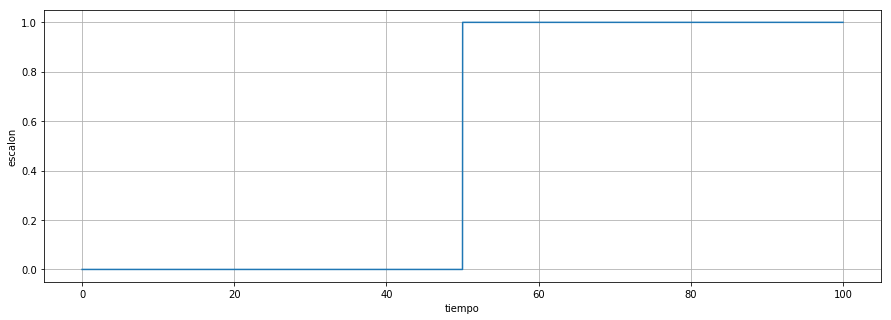

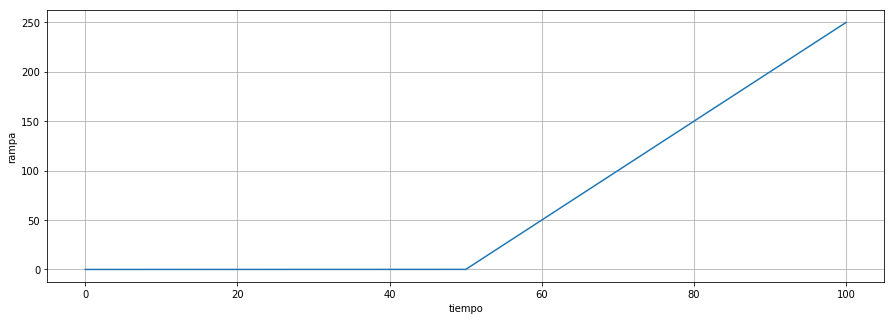

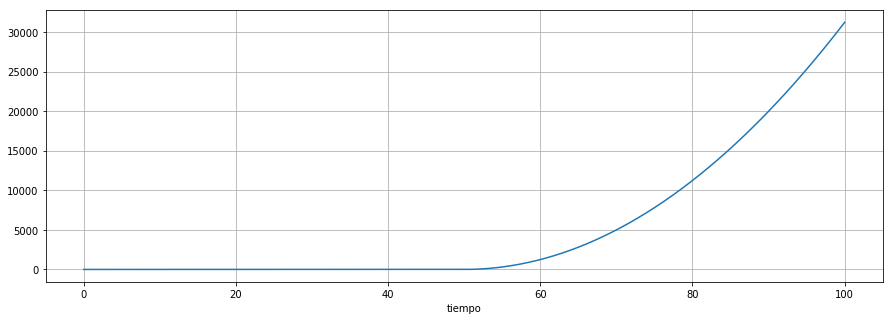

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = 10;
w = 2*np.pi*f;
time_interval = 100;
samples = 5000;

#t=np.linspace(0,time_interval,samples);
t=np.linspace(0,time_interval,samples)
step = np.heaviside(np.linspace(-samples/2,samples/2,samples), 0.5)
#dirac = np.zeros(samples)
#dirac[samples/2] = 1;

signal = DSP(step,f);
rampa = signal.integrate();
cuadratica = signal.integrate2();

plt.rcParams['figure.figsize'] = (15,5)

fig0, ax = plt.subplots()
ax.plot(t,step)
plt.ylabel ("escalon")
plt.xlabel("tiempo")
plt.grid()
plt.show

fig1, bx = plt.subplots()
bx.plot(t,rampa);
plt.ylabel("rampa")
plt.xlabel("tiempo")
plt.grid()
plt.show()

fig2, cx = plt.subplots()
cx.plot(t,cuadratica)
plt.xlabel("tiempo")
plt.grid()
plt.show()

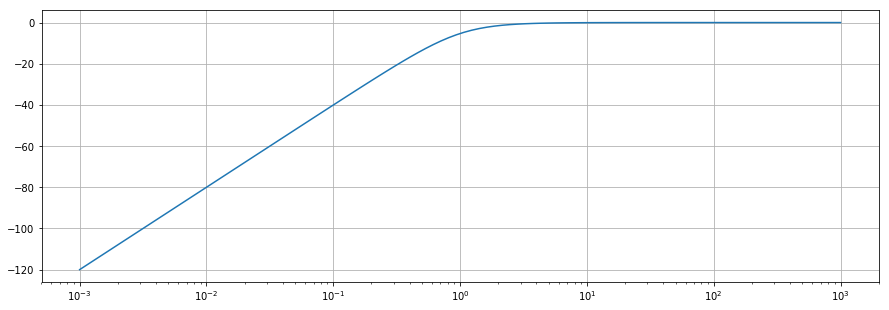

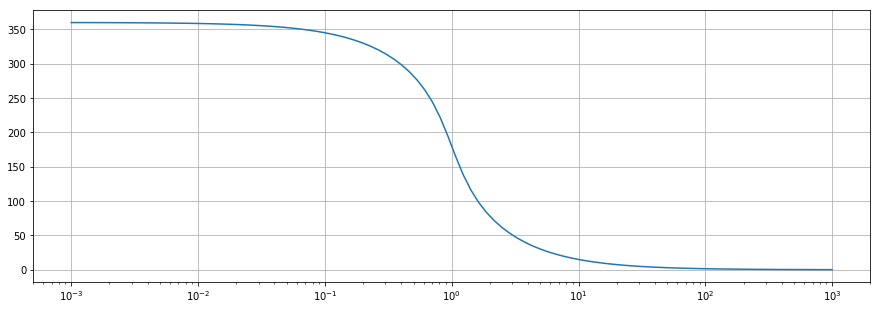

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
w = np.logspace(-3,3,100)
s1 = signal.lti([1, 0, 0], [1, 1.848, 1])
s2 = signal.lti([1, 0, 0], [1, 0.765, 1])
w1, mag1, phase1 = signal.bode(s1,w)
w2, mag2, phase2 = signal.bode(s2,w)

mag = mag1+mag2
phase = phase1 + phase2

plt.figure()
plt.semilogx(w, mag1)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

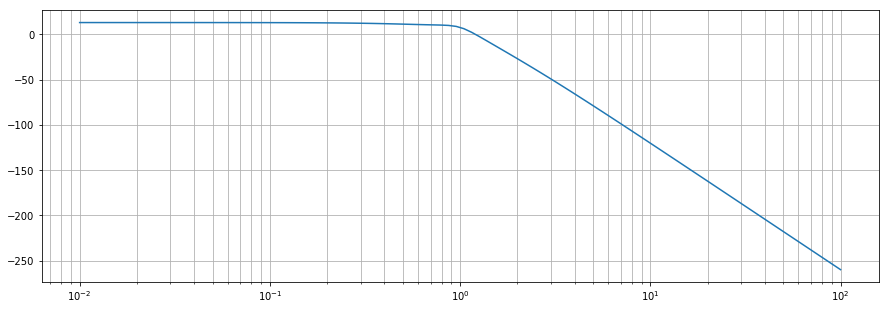

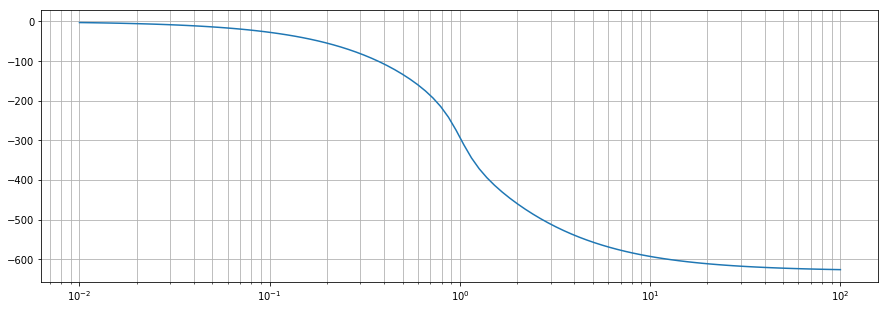

In [29]:
from scipy import signal
import matplotlib.pyplot as plt
w = np.logspace(-2,2,100)
s1 = signal.lti([1], [1, 1.8, 1],5)
s2 = signal.lti([1], [1, 1.25, 1],2)
s3 = signal.lti([1],[1, 0.445, 1])
s4 = signal.lti([1], [1,1])
w1, mag1, phase1 = signal.bode(s1,w)
w2, mag2, phase2 = signal.bode(s2,w)
w3, mag3, phase3 = signal.bode(s3,w)
w4, mag4, phase4 = signal.bode(s4,w)

mag = +mag1+mag2+mag3+mag4
phase = -phase1-phase2+phase3+phase4

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True,which="both",ls="-")
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True,which="both",ls="-")
plt.show()

